In [14]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'A':['ha','hi','ho','ha','ho'],
                  'B':['one','two','one','one','two'],
                  'Data1': np.random.rand(5),
                  'Data2': np.random.rand(5)})
df

,A,B,Data1,Data2
0,ha,one,0.800788,0.482167
1,hi,two,0.359543,0.238633
2,ho,one,0.750564,0.211127
3,ha,one,0.386446,0.767975
4,ho,two,0.129723,0.744155


In [18]:
df.groupby(['A'])

In [19]:
df1 = df.groupby(['A'])
gr_dict = dict(list(df1))
print(gr_dict)

{'ha':     A    B     Data1     Data2
0  ha  one  0.800788  0.482167
3  ha  one  0.386446  0.767975, 'hi':     A    B     Data1     Data2
1  hi  two  0.359543  0.238633, 'ho':     A    B     Data1     Data2
2  ho  one  0.750564  0.211127
4  ho  two  0.129723  0.744155}


In [17]:
print(df1.get_group('ho'))
df2 = df.groupby(['A','B']).get_group(('ha','one'))
print(df2)

    A    B     Data1     Data2
2  ho  one  0.750564  0.211127
4  ho  two  0.129723  0.744155
    A    B     Data1     Data2
0  ha  one  0.800788  0.482167
3  ha  one  0.386446  0.767975


In [13]:
df3 = df['Data2'].groupby(df['B'])
#print(df3.mean())
print(df3)

In [11]:
df2 = pd.DataFrame({'A':['ho','hi','ha'],
                  'B':['two','one','two'],
                  'Data1': np.random.rand(3)})
print(df2)
print(df2.groupby(['A']).sum())

    A    B     Data1
0  ho  two  0.193928
1  hi  one  0.637837
2  ha  two  0.735946
       Data1
A           
ha  0.735946
hi  0.637837
ho  0.193928


In [12]:
df2.groupby('A',sort = False).sum() #순서정렬 없이

,Data1
A,
ho,0.193928
hi,0.637837
ha,0.735946


In [36]:
arr = [['ha','ha','hi','hi','ho','ho'],['one','two','one','one','two','two']]
ind = pd.MultiIndex.from_arrays(arr,names = ['1st','2nd'])
#print(ind)
ser = pd.Series(np.random.randn(6), index = ind)
#print(ser)
#print(ser.groupby(['1st','2nd']).mean())

In [37]:
ind

MultiIndex([('ha', 'one'),
            ('ha', 'two'),
            ('hi', 'one'),
            ('hi', 'one'),
            ('ho', 'two'),
            ('ho', 'two')],
           names=['1st', '2nd'])

In [38]:
ser

1st  2nd
ha   one    0.807032
     two   -0.608389
hi   one   -0.523520
     one   -0.761764
ho   two    0.341911
     two   -0.875647
dtype: float64

In [27]:
for name, group in df.groupby('A'):
    print(name)
    print(group)

ha
    A    B     Data1     Data2
0  ha  one  0.800788  0.482167
3  ha  one  0.386446  0.767975
hi
    A    B     Data1     Data2
1  hi  two  0.359543  0.238633
ho
    A    B     Data1     Data2
2  ho  one  0.750564  0.211127
4  ho  two  0.129723  0.744155


In [35]:
df = pd.DataFrame({'A':['ha','hi','ho','ha','ho'],
                  'B':['one','two','one','one','two'],
                  'Data1': np.random.rand(5),
                  'Data2': np.random.rand(5)})
df

,A,B,Data1,Data2
0,ha,one,0.646421,0.811266
1,hi,two,0.845231,0.358712
2,ho,one,0.334992,0.908787
3,ha,one,0.551091,0.875301
4,ho,two,0.517502,0.235278


In [42]:
df1 = df.groupby('A')
print(df1.groups)

{'ha': [0, 3], 'hi': [1], 'ho': [2, 4]}


In [43]:
print(df1.agg(sum))

       Data1     Data2
A                     
ha  1.197512  1.686567
hi  0.845231  0.358712
ho  0.852494  1.144064


In [45]:
df2 = df.groupby(['A','B'])
df2_1 = df.groupby(['A','B'], as_index = False)
print(df2.agg(sum))
print(df2_1.count())
print(df2_1.size())

           Data1     Data2
A  B                      
ha one  1.197512  1.686567
hi two  0.845231  0.358712
ho one  0.334992  0.908787
   two  0.517502  0.235278
    A    B  Data1  Data2
0  ha  one      2      2
1  hi  two      1      1
2  ho  one      1      1
3  ho  two      1      1
    A    B  size
0  ha  one     2
1  hi  two     1
2  ho  one     1
3  ho  two     1


In [46]:
print(df1.agg({'Data2': np.sum, 'Data1': lambda x : np.mean(x)}))

       Data2     Data1
A                     
ha  1.686567  0.598756
hi  0.358712  0.845231
ho  1.144064  0.426247


In [56]:
df1 = pd.DataFrame({'A':['ha','hi','ho','ha','ho'],
                  'B':['one','two','one','one','two'],
                  'Data1': np.random.rand(5),
                  'Data2': np.random.rand(5)},index = [0,1,2,3,4])
df2 = pd.DataFrame({'A':['ha','hi','ho','ha','ho'],
                  'B':['one','two','one','one','two'],
                  'Data1': np.random.rand(5),
                  'Data2': np.random.rand(5)},index = [0,1,2,3,4])
df3 = pd.DataFrame({'A':['ha','hi','ho','ha','ho'],
                  'B':['one','two','one','one','two'],
                  'Data1': np.random.rand(5),
                  'Data2': np.random.rand(5)},index = [0,1,2,3,4])

df_c = [df1,df2,df3]
df4 = pd.concat(df_c)

In [57]:
df4

,A,B,Data1,Data2
0,ha,one,0.754813,0.007378
1,hi,two,0.492588,0.794184
2,ho,one,0.711638,0.965155
3,ha,one,0.884553,0.793868
4,ho,two,0.997241,0.354247
0,ha,one,0.522193,0.319755
1,hi,two,0.873412,0.995968
2,ho,one,0.147248,0.070636
3,ha,one,0.524391,0.501679
4,ho,two,0.905779,0.850580


In [49]:
df4.reset_index()

,index,A,B,Data1,Data2
0,0,ha,one,0.317915,0.051067
1,1,hi,two,0.644072,0.342410
2,2,ho,one,0.169844,0.490428
3,3,ha,one,0.623240,0.107307
4,4,ho,two,0.922825,0.300020
5,0,ha,one,0.260464,0.432293
6,1,hi,two,0.982645,0.543410
7,2,ho,one,0.615274,0.483239
8,3,ha,one,0.420734,0.624052
9,4,ho,two,0.749641,0.204536


In [50]:
'''중요한 apply'''
df4_1 = df4['Data1'].apply(lambda x : x/100)
df4_1

0    0.003179
1    0.006441
2    0.001698
3    0.006232
4    0.009228
0    0.002605
1    0.009826
2    0.006153
3    0.004207
4    0.007496
0    0.001174
1    0.008031
2    0.009848
3    0.001300
4    0.004229
Name: Data1, dtype: float64

In [58]:
df4["Data1_c"] = df4['Data1'].apply(lambda x : x/100)
df4["Data1_d"] = df4['Data1'] > df4["Data1_c"]

In [59]:
df4

,A,B,Data1,Data2,Data1_c,Data1_d
0,ha,one,0.754813,0.007378,0.007548,True
1,hi,two,0.492588,0.794184,0.004926,True
2,ho,one,0.711638,0.965155,0.007116,True
3,ha,one,0.884553,0.793868,0.008846,True
4,ho,two,0.997241,0.354247,0.009972,True
0,ha,one,0.522193,0.319755,0.005222,True
1,hi,two,0.873412,0.995968,0.008734,True
2,ho,one,0.147248,0.070636,0.001472,True
3,ha,one,0.524391,0.501679,0.005244,True
4,ho,two,0.905779,0.850580,0.009058,True


In [60]:
print(df4.sort_values(by='Data1_d'))

    A    B     Data1     Data2   Data1_c  Data1_d
0  ha  one  0.754813  0.007378  0.007548     True
1  hi  two  0.492588  0.794184  0.004926     True
2  ho  one  0.711638  0.965155  0.007116     True
3  ha  one  0.884553  0.793868  0.008846     True
4  ho  two  0.997241  0.354247  0.009972     True
0  ha  one  0.522193  0.319755  0.005222     True
1  hi  two  0.873412  0.995968  0.008734     True
2  ho  one  0.147248  0.070636  0.001472     True
3  ha  one  0.524391  0.501679  0.005244     True
4  ho  two  0.905779  0.850580  0.009058     True
0  ha  one  0.589368  0.700504  0.005894     True
1  hi  two  0.123065  0.024700  0.001231     True
2  ho  one  0.381766  0.882736  0.003818     True
3  ha  one  0.612863  0.851318  0.006129     True
4  ho  two  0.054853  0.098441  0.000549     True


In [61]:
df4.head()

,A,B,Data1,Data2,Data1_c,Data1_d
0,ha,one,0.754813,0.007378,0.007548,True
1,hi,two,0.492588,0.794184,0.004926,True
2,ho,one,0.711638,0.965155,0.007116,True
3,ha,one,0.884553,0.793868,0.008846,True
4,ho,two,0.997241,0.354247,0.009972,True


In [63]:
ser = pd.Series([1,2,3,4,5,6])
print(ser)
print(ser.pct_change())
print(ser.pct_change(periods = 2))

0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64
0         NaN
1    1.000000
2    0.500000
3    0.333333
4    0.250000
5    0.200000
dtype: float64
0         NaN
1         NaN
2    2.000000
3    1.000000
4    0.666667
5    0.500000
dtype: float64


In [66]:
ser1 = pd.Series(np.random.rand(100))
ser2 = pd.Series(np.random.rand(100))
print(ser2.cov(ser1))

0.0015322091844575836


In [65]:
df = pd.DataFrame(np.random.rand(1000,3),columns = ['a','b','c'])
print(df.cov())

          a         b         c
a  0.085661 -0.003052  0.004571
b -0.003052  0.083215 -0.002074
c  0.004571 -0.002074  0.081278


In [67]:
df['a'].corr(df['b'])

-0.03615353300235081

In [69]:
df['a'].corr(df['b'],method = 'spearman')

-0.03567669567669568

In [70]:
df.corr()

,a,b,c
a,1.000000,-0.036154,0.054785
b,-0.036154,1.000000,-0.025216
c,0.054785,-0.025216,1.000000


In [71]:
df['a'].corr(df['b'],method = 'kendall')

-0.024444444444444446

In [73]:
df = pd.DataFrame(np.random.randn(500, 3),
columns=['a', 'b', 'c'])
df.iloc[::2] = np.nan
print(df.head(6))
print(df.corr())

          a         b         c
0       NaN       NaN       NaN
1 -0.602010 -0.782365 -1.971695
2       NaN       NaN       NaN
3 -0.256344  0.434690  1.350636
4       NaN       NaN       NaN
5  0.478631  1.026562  0.103074
          a         b         c
a  1.000000  0.043998 -0.019341
b  0.043998  1.000000  0.098679
c -0.019341  0.098679  1.000000


In [76]:
ind = ['a','b','c','d']
col = ['one','two','three']
df1 = pd.DataFrame(np.random.rand(4,3),index = ind, columns = col)
df2 = pd.DataFrame(np.random.rand(3,3),index = ind[:3], columns = col)
print(df1.corrwith(df2))
print(df2.corrwith(df1,axis=1))

'''
트랜포스 조심해서 쓰기
index 개수 조심하기
'''

one     -0.864001
two     -0.934677
three   -0.274750
dtype: float64
a    0.991415
b   -0.912100
c   -0.275125
d         NaN
dtype: float64


In [82]:
ser = pd.Series(np.random.randn(5),index = list('abcde'))
print(ser)
ser['d'] = ser['b']
print(ser)
print(ser.rank())
'''
가장 작은 것 부터 큰 것으로 순위 매기기
'''

a    1.043575
b   -0.962269
c    1.673721
d   -0.140355
e   -0.381959
dtype: float64
a    1.043575
b   -0.962269
c    1.673721
d   -0.962269
e   -0.381959
dtype: float64
a    4.0
b    1.5
c    5.0
d    1.5
e    3.0
dtype: float64


'\n가장 작은 것 부터 큰 것으로 순위 매기기\n'

In [98]:
s = pd.Series(np.random.randn(1000),index = pd.date_range('1/1/2020',periods = 1000))
print(s)

2020-01-01   -0.575381
2020-01-02    0.166741
2020-01-03    1.453213
2020-01-04    0.387366
2020-01-05   -2.559047
                ...   
2022-09-22    1.803085
2022-09-23   -0.584551
2022-09-24   -0.753966
2022-09-25    0.906289
2022-09-26   -1.714790
Freq: D, Length: 1000, dtype: float64


In [84]:
print(s.cumsum())

2020-01-01      0.500444
2020-01-02      1.278190
2020-01-03      2.249198
2020-01-04      2.569513
2020-01-05      3.421825
                 ...    
2022-09-22    503.031586
2022-09-23    503.688532
2022-09-24    503.982279
2022-09-25    504.461626
2022-09-26    504.558265
Freq: D, Length: 1000, dtype: float64


In [87]:
s1 = s.rolling (window = 60)
print(s1)
print(type(s1))

Rolling [window=60,center=False,axis=0,method=single]
<class 'pandas.core.window.rolling.Rolling'>


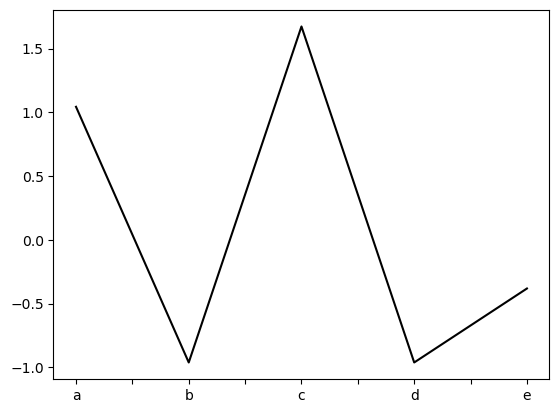

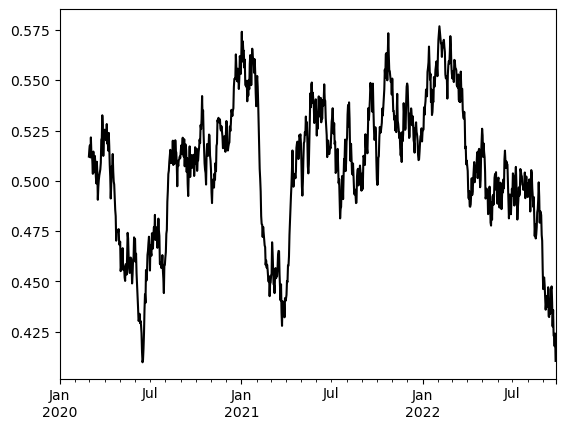

In [91]:
import matplotlib.pyplot as plt
ser.plot(style='k')
plt.show()
s1.mean().plot(style='k-')
plt.show()

In [97]:
df = pd.DataFrame(np.random.randn(500,3), 
                  index = pd.date_range('1/1/2020',periods = 500),
                  columns = ['A','B','C'] )
dfc = df.cumsum()
print(dfc)
df1 = dfc[:20]
print(df1.rolling(window=3).corr(df1['B']))

                    A         B         C
2020-01-01  -0.240539  1.792847  0.910854
2020-01-02  -1.380595  2.697024  2.700367
2020-01-03   0.322337  2.939706  1.984694
2020-01-04  -1.005142  2.052530  1.771579
2020-01-05  -0.379888  1.436610  1.160427
...               ...       ...       ...
2021-05-10 -19.015072  1.861122  3.121489
2021-05-11 -19.726752  0.215436  4.233361
2021-05-12 -22.634864 -1.115311  4.672581
2021-05-13 -20.549616 -0.462857  4.763147
2021-05-14 -20.327287 -0.835844  4.130248

[500 rows x 3 columns]
                   A    B         C
2020-01-01       NaN  NaN       NaN
2020-01-02       NaN  NaN       NaN
2020-01-03  0.008899  1.0  0.819250
2020-01-04  0.548065  1.0  0.458732
2020-01-05  0.613811  1.0  0.930246
2020-01-06 -0.979947  1.0  0.924746
2020-01-07 -0.997720  1.0  0.912750
2020-01-08 -0.205104  1.0  0.685430
2020-01-09  0.997736  1.0  0.988501
2020-01-10 -0.741794  1.0  0.314921
2020-01-11 -0.784899  1.0 -0.719707
2020-01-12  0.921083  1.0 -0.974832
2020